In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
#catch data
df = pd.read_csv('headbrain.csv')
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [10]:
#Dependent variable(y) and independent variabl(x)
X = df['Head Size(cm^3)'].values
Y = df['Brain Weight(grams)'].values

In [13]:
#correlation between xx, xy, yx, yy
np.corrcoef(X,Y)

array([[1.        , 0.79956971],
       [0.79956971, 1.        ]])

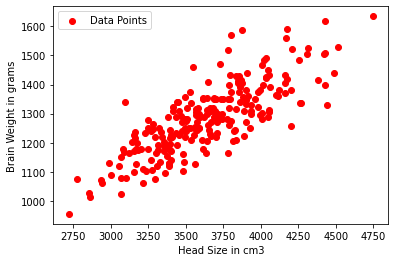

In [21]:
#plotting data based on the input
plt.scatter(X, Y, c='red', label='Data Points')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [27]:
#calculating coefficient

#mean X and mean Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [36]:
#length of data
n = len(X)

#Using the formula to calculate b1 and b2
#numerator
numer = 0
#denomenator
denom = 0
for i in range(n):
  numer += (X[i] - mean_x)*(Y[i] - mean_y)
  denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1*mean_x)

#printing coefficients
print('coefficients for regression:', b1, b0)

coefficients for regression: 0.26342933948939945 325.57342104944223


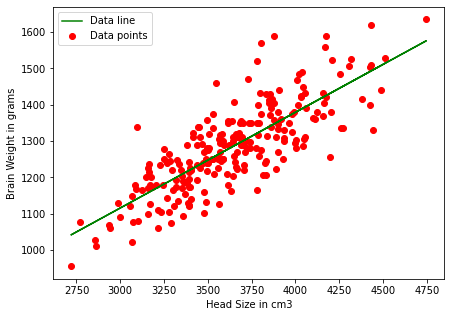

In [45]:
#plotting values and regression line
%matplotlib inline

#figure size
plt.rcParams['figure.figsize'] = (7.0, 5.0)

max_x = np.mean(X) + 100
min_x = np.mean(X) - 100

y = b0 + b1 * X

#plotting line
plt.plot(X, y, c = 'green', label = 'Data line')
#plotting scatter points
plt.scatter(X, Y, c = 'red', label = 'Data points')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [46]:
#calculating Root Mean Square Error(RMSE)
#RMSE is standard deviation of the residuals (prediction errors)
#Residuals are a measure of how far from the regression line data points are
#it tells you how concentrated the data is around the line of best fit.

rmse = 0
for i in range(n):
  y_pred = b0 + b1 * X[i]
  rmse += (Y[i] - y_pred)**2

rmse = np.sqrt(rmse/n)
print("Root Mean Square Error: ", rmse)

Root Mean Square Error:  72.1206213783709


In [48]:
#calculating R2 Score
#if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all
ss_tot = 0
ss_res = 0
for i in range(n):
  y_pred = b0 + b1 * X[i]
  ss_tot += (Y[i] - mean_y) ** 2
  ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print('R2 Score: ', r2)

R2 Score:  0.6393117199570003


In [50]:
#import machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n, 1))

#creating model
reg = LinearRegression()
#fitting trainin data
reg = reg.fit(X, Y)
#Y prediction
Y_pred = reg.predict(X)

#calculating R2
r2_score = reg.score (X,Y)
print(r2_score)

0.639311719957
